<a href="https://colab.research.google.com/github/nasirudeenraheem/CrunchoDao-Master-data-Notebook/blob/main/Crunch_Master_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CrunchDao

CrunchDAO is a data science competition platform for data scientists to learn, improve their modeling skills, and earn on a weekend basis. They run a series of datasets made of financial datasets.

The CrunchDAO is a group of engineers, finance geeks, former Wall Street analysts, and finance teachers interested in modern economics’ underlying dynamics.

CrunchDAO is a research team leveraging the power of collective intelligence and Web3 to produce next-generation financial predictions.

Read More - https://nasere4567.medium.com/the-crunchdao-machine-learning-competition-be86cfb1b81f

## Outline

1. Load the data

2. Investigate the data

3. Data Visualization and Correlation Analysis

4. Validation Scheme

5. Machine Learning Model

6. Submit Prediction.

## Load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import requests
from scipy import stats

from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
import scipy

In [2]:
train = pd.read_csv("https://tournament.crunchdao.com/data/X_train.csv")
train_targets = pd.read_csv("https://tournament.crunchdao.com/data/y_train.csv")
test = pd.read_csv("https://tournament.crunchdao.com/data/X_test.csv")

## Investigate the data

In [3]:
print(train.shape)
print(train_targets.shape)
print(test.shape)

(307618, 618)
(307618, 6)
(10662, 618)


In [4]:
train.head()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,vratios_Feature_108,vratios_Feature_109,vratios_Feature_110,vratios_Feature_111,vratios_Feature_112,vratios_Feature_113,vratios_Feature_114,vratios_Feature_115,vratios_Feature_116,vratios_Feature_117
0,152637,0,0.83,0.67,1.00,0.67,0.33,0.50,0.17,0.17,...,0.17,0.33,0.67,0.83,0.83,0.67,0.50,0.50,0.50,0.67
1,135698,0,0.50,0.50,0.17,0.17,0.33,0.33,0.50,0.50,...,1.00,1.00,0.67,0.33,0.50,0.50,0.83,0.83,0.33,0.67
2,135696,0,0.67,0.67,0.33,0.33,0.33,0.67,0.50,0.50,...,0.33,0.00,0.83,0.33,0.33,0.50,0.50,0.17,0.33,0.50
3,231707,0,0.33,0.83,0.17,0.33,0.17,0.00,1.00,0.50,...,1.00,1.00,0.83,0.17,0.17,0.17,0.67,0.67,0.00,0.83
4,22688,0,0.33,1.00,0.33,0.50,0.50,0.67,0.67,0.50,...,0.33,0.17,0.50,0.33,0.17,0.17,0.17,0.33,0.50,0.67


#### check missing values

In [5]:
print(train.columns[train.isnull().any()])
print(test.columns[test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


#### check duplicate values

In [6]:
train[train.duplicated()]

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,vratios_Feature_108,vratios_Feature_109,vratios_Feature_110,vratios_Feature_111,vratios_Feature_112,vratios_Feature_113,vratios_Feature_114,vratios_Feature_115,vratios_Feature_116,vratios_Feature_117


**Observation**

* There is no missing values and duplicate values in the dataset.

#### Target Distribution 

In this problem, we have 4 targets to make submissions for.

In [7]:
target_col = train_targets.columns[train_targets.columns.str.contains('target')]

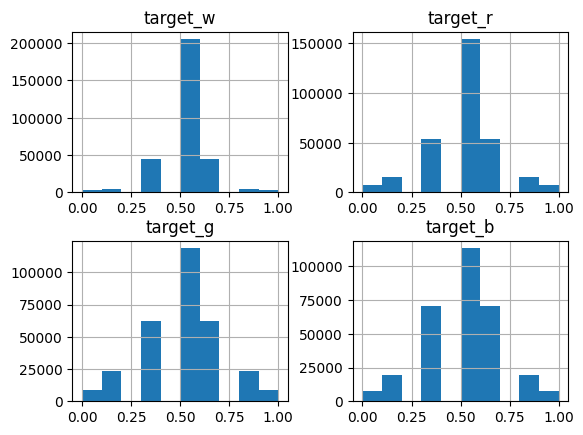

In [8]:
train_targets[target_col].hist();

**observation**

* The range of the target distribution is from 0-1. 

#### merge the train data and target by moons and id. 

In [9]:
train = pd.merge(train, train_targets, on=['id', 'Moons'], how='inner')

In [10]:
print(train.shape)

(307618, 622)


#### Find the unique data that are joined together to make the master dataset.

In [11]:
unique_col_name = list(set(pd.DataFrame(train.columns)[0].apply(lambda x:x.split('_')[0])))

In [12]:
print('we have {} unique columns names'.format(len(unique_col_name)))

we have 10 unique columns names


In [13]:
unique_col_name

['target',
 'Moons',
 'ekinetic',
 'id',
 'gordon',
 'wrythm',
 'vratios',
 '3b1-signal',
 'dolly',
 'cmechanics']

## Data Visualization

we are going to take a glance at the data distribution for each unique data that make the master dataset.

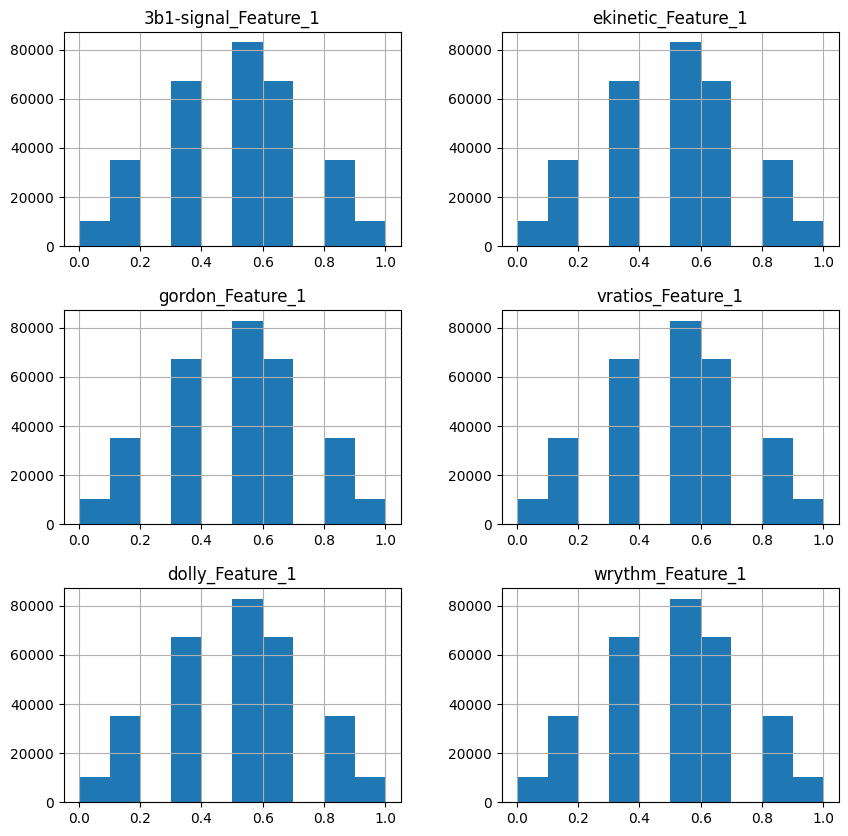

In [14]:
train[['3b1-signal_Feature_1', 'ekinetic_Feature_1', 'gordon_Feature_1', 'vratios_Feature_1', 'dolly_Feature_1', 'wrythm_Feature_1']].hist(bins=10, figsize=(10,10));

**Observation**

* The distribution looks the same across all data combined.

* All the data point have been standardized.

Read more - https://desci.crunchdao.com/projects/crunchdao/feature-engineering

#### Looking at the moons

In [15]:
train['Moons'].value_counts(normalize=True)

106    0.002948
109    0.002945
108    0.002942
111    0.002942
107    0.002939
         ...   
234    0.002633
244    0.002630
245    0.002610
246    0.002597
247    0.002597
Name: Moons, Length: 358, dtype: float64

In [16]:
test['Moons'].value_counts(normalize=True)

369    0.077940
370    0.077753
358    0.077565
359    0.077471
360    0.077284
365    0.077284
366    0.077284
367    0.077284
368    0.077096
363    0.075877
361    0.075783
362    0.075689
364    0.075689
Name: Moons, dtype: float64

In [17]:
print(train['Moons'].nunique())
print(test['Moons'].nunique())

358
13


**Observation**

* we observe that there is no much difference by frequency count of each **Moons**


### Look at the top 15 features correlation with each target.

In [19]:
tar_w_corr = train.corr()['target_w'].reset_index()
tar_r_corr = train.corr()['target_r'].reset_index()
tar_g_corr = train.corr()['target_g'].reset_index()
tar_b_corr = train.corr()['target_b'].reset_index()

In [20]:
tar_w_corr['target_w'] = abs(tar_w_corr['target_w'])
tar_r_corr['target_r'] = abs(tar_r_corr['target_r'])
tar_g_corr['target_g'] = abs(tar_g_corr['target_g'])
tar_b_corr['target_b'] = abs(tar_b_corr['target_b'])

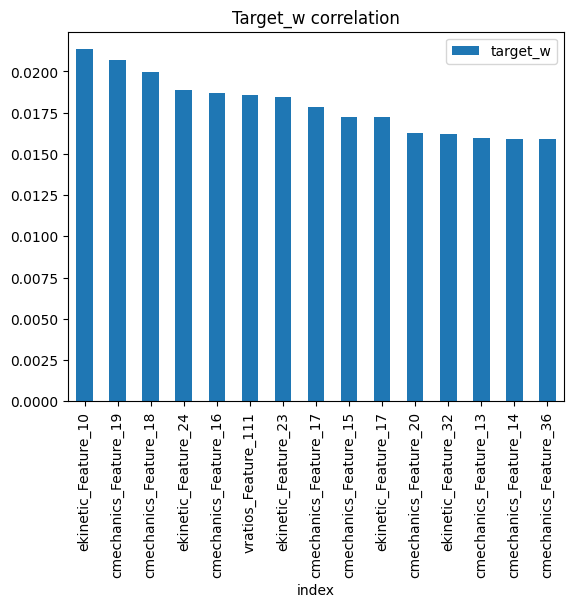

In [21]:
tar_w_corr.sort_values(by='target_w', ascending=False)[4:19].set_index('index').plot(kind='bar', title='Target_w correlation');

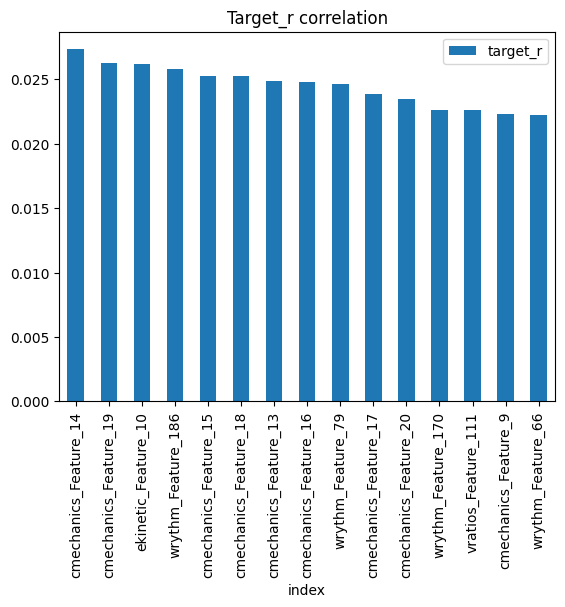

In [22]:
tar_r_corr.sort_values(by='target_r', ascending=False)[4:19].set_index('index').plot(kind='bar', title='Target_r correlation');

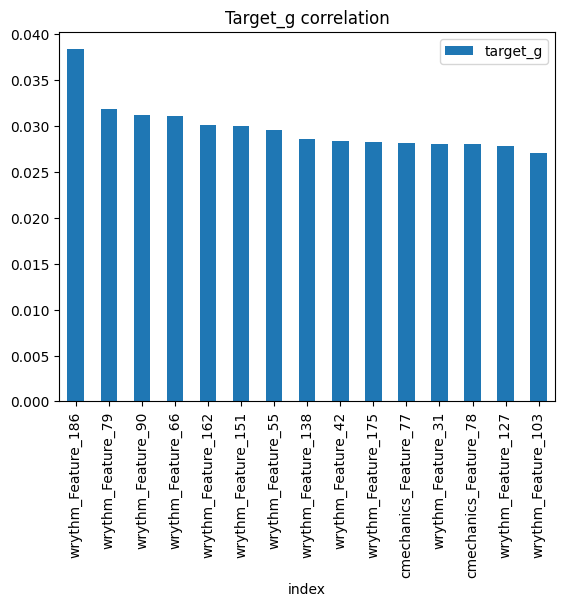

In [23]:
tar_g_corr.sort_values(by='target_g', ascending=False)[4:19].set_index('index').plot(kind='bar', title='Target_g correlation');

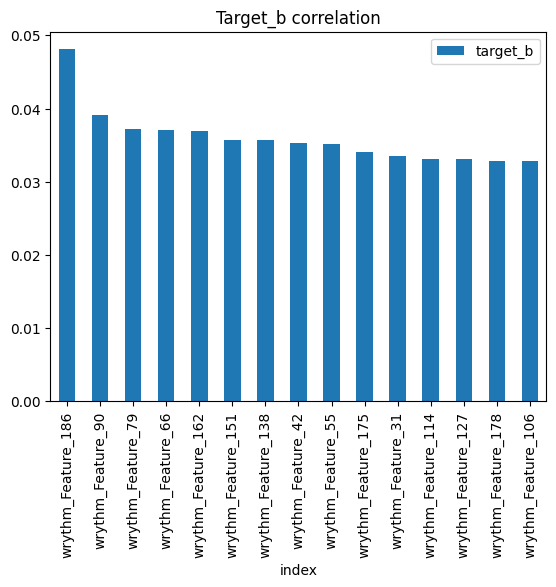

In [24]:
tar_b_corr.sort_values(by='target_b', ascending=False)[4:19].set_index('index').plot(kind='bar', title='Target_b correlation');

**Observation**

* Target w and Target r top 15 features contain mostly ekinetic and cmechanics data.

* Target g and Target b top 15 features mostly consists of wrythm data.

## Create submission format.

In [18]:
submission = test[['id', 'Moons']]

In [ ]:
submission['target_w'] = np.nan
submission['target_r'] = np.nan
submission['target_g'] = np.nan
submission['target_b'] = np.nan

In [20]:
submission

,id,Moons,target_w,target_r,target_g,target_b
0,111397,358,NaN,NaN,NaN,NaN
1,111329,358,NaN,NaN,NaN,NaN
2,223798,358,NaN,NaN,NaN,NaN
3,178816,358,NaN,NaN,NaN,NaN
4,297884,358,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10657,167175,370,NaN,NaN,NaN,NaN
10658,148159,370,NaN,NaN,NaN,NaN
10659,153147,370,NaN,NaN,NaN,NaN
10660,45199,370,NaN,NaN,NaN,NaN


In [21]:
target = train[train.columns[train.columns.str.contains('target')]]

## Cross Validation scheme

* Cross Validation scheme - In this notebook, we use one-holdout cross validation without taking randomness into consideration because the **Moons** have Time Series distribution nature.

In [22]:
train_data = train[train['Moons'] <=340].reset_index(drop=True)
validation_data = train[train['Moons'] >340].reset_index(drop=True)

In [23]:
train_data = train_data.drop(['id', 'Moons'], axis=1)
validation_data = validation_data.drop(['id', 'Moons'], axis=1)
test_data = test.drop(['id', 'Moons'], axis=1)

In [24]:
target_col = train.columns[train.columns.str.contains('target')]

In [25]:
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]
X_valid = validation_data.drop(target_col, axis=1)
y_valid = validation_data[target_col]

In [26]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(293592, 616)
(14026, 616)
(293592, 4)
(14026, 4)


## Validation score check

The performance of the model is tested with spearman correlation. Spearman correlation ranges from 0-1, the closer to 1 the better the model.

The model performance will be represented by percentage here.

In [27]:
def scorer(y_valid, y_pred):
    score = (stats.spearmanr(y_valid, y_pred))[0].round(4)
    print('Score as calculated for the leader board {}%'.format(score *100))

## Machine Learning Model

LightGBM, short for light gradient-boosting machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

#### Benefit of LightGbm

1. Faster training speed and higher efficiency.

2. Better Accuracy

In [28]:
def lgb_model(X_train, y_train, X_valid, y_valid):
    model = LGBMRegressor(num_leaves=256)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    scorer(y_valid, pred)

    return model

In [29]:
model_target_w = lgb_model(X_train, y_train['target_w'],X_valid, y_valid['target_w'])
model_target_r = lgb_model(X_train, y_train['target_r'],X_valid, y_valid['target_r'])
model_target_g = lgb_model(X_train, y_train['target_g'],X_valid, y_valid['target_g'])
model_target_b = lgb_model(X_train, y_train['target_b'],X_valid, y_valid['target_b'])

Score as calculated for the leader board 0.15%
Score as calculated for the leader board 7.969999999999999%
Score as calculated for the leader board 13.209999999999999%
Score as calculated for the leader board 20.48%


## Making submission on the test set.

In [ ]:
submission['target_w'] = model_target_w.predict(test_data)
submission['target_r'] = model_target_r.predict(test_data)
submission['target_g'] = model_target_g.predict(test_data)
submission['target_b'] = model_target_b.predict(test_data)

In [31]:
submission

,id,Moons,target_w,target_r,target_g,target_b
0,111397,358,0.502057,0.522590,0.473905,0.405732
1,111329,358,0.513633,0.517929,0.547040,0.519663
2,223798,358,0.468588,0.478488,0.463512,0.457000
3,178816,358,0.506720,0.562631,0.541524,0.567549
4,297884,358,0.489899,0.490387,0.506642,0.463841
...,...,...,...,...,...,...
10657,167175,370,0.504756,0.498014,0.536910,0.496509
10658,148159,370,0.494760,0.488658,0.481284,0.476039
10659,153147,370,0.510503,0.485316,0.511216,0.471429
10660,45199,370,0.494113,0.530823,0.583257,0.509571


## Submit Prediction

In [32]:
submission.to_csv('submission.csv', index=False)

## Final Note

1. Try to join CrunchDao.

2. Try different machine learning models for each target.

3. For now on my side Lightgbm is performing well on the livescore leaderboard.